<a href="https://colab.research.google.com/github/Ruchi1708/CNN-Project1/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [20]:
history = model.fit(train_ds,epochs = 10, validation_data = validation_ds)


Epoch 1/10
625/625 [==============================] - 73s 115ms/step - loss: 1.1304 - accuracy: 0.6129 - val_loss: 0.7253 - val_accuracy: 0.5312
Epoch 2/10
625/625 [==============================] - 71s 112ms/step - loss: 0.5788 - accuracy: 0.7063 - val_loss: 0.5321 - val_accuracy: 0.7352
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4810 - accuracy: 0.7728 - val_loss: 0.6948 - val_accuracy: 0.6518
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4322 - accuracy: 0.8041 - val_loss: 0.5361 - val_accuracy: 0.7440
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3654 - accuracy: 0.8361 - val_loss: 0.3907 - val_accuracy: 0.8282
Epoch 6/10
625/625 [==============================] - 71s 112ms/step - loss: 0.2913 - accuracy: 0.8766 - val_loss: 0.4829 - val_accuracy: 0.7810
Epoch 7/10
625/625 [==============================] - 73s 117ms/step - loss: 0.2149 - accuracy: 0.9097 - val_loss: 0.5017 - val_ac

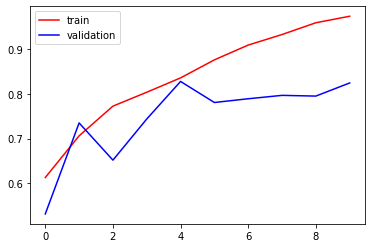

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()

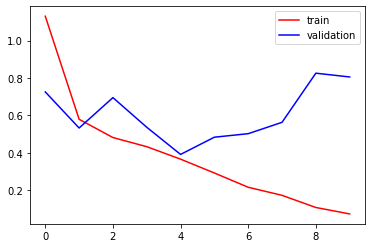

In [22]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()